#                                       **RFM Analysis Online Retail II**

# General Information About the Data Set 

The dataset named "online_retail_II" contains the sales of a UK based online retailer between 01/12/2009 - 09/12/2011. This company sells souvenirs. It can be considered as promotional products. Most of its customers are wholesalers.


**Variables:**

- InvoiceNo: Invoice number. It is a unique value. If this code starts with C, it indicates a return.
- StockCode: Product code. A unique number for each product.
- Description: Product name.
- Quantity: Product quantity. Indicates how many of the products were sold on the invoices. It takes negative values for items starting with C (returns).
- InvoiceDate: Invoice date and time.
- UnitPrice: Product price (in Sterling).
- CustomerID: Customer number. A unique number for each customer.

**I will use sheet 1 in the Excel dataset. I will do the RFM analysis over the years 2009-2010.**

# Information about RFM


# RFM Analysis: Understanding Customer Segmentation

RFM (Recency, Frequency, Monetary) analysis is a method used for customer segmentation and crafting marketing strategies. RFM stands for the initials of its three core components. This analysis aims to categorize customers based on specific criteria and divide them into different segments.

## Key Concepts of RFM Analysis:

### Recency (R):
- Represents the time that has passed since a customer's last purchase.
- Customers with more recent purchases are generally considered more valuable, as they are likely to engage in repeated transactions.

### Frequency (F):
- Indicates how often a customer makes purchases within a specific time frame.
- Customers who shop frequently are often considered more loyal and valuable.

### Monetary (M):
- Refers to the total amount of money a customer has spent.
- Customers who have made significant purchases are often more financially impactful and potentially more responsive to special offers.

## RFM Segmentation Categories:

- **Champions**:
  - Customers with high recency, frequency, and monetary values.

- **Valued Customers**:
  - Customers with high monetary value but potentially lower recency and frequency.

- **Recoverable Customers**:
  - Customers with low recency, moderate frequency, and monetary values.
  - This segment includes customers who can be re-engaged.

- **At Risk Customers**:
  - Customers with low recency, low frequency, and monetary values.
  - These customers are at risk of attrition.

- **Lost Customers**:
  - Customers with the lowest recency, frequency, and monetary values.
  - This segment generally includes customers who are harder to re-engage.

RFM analysis is used to personalize marketing strategies, enhance customer loyalty, and create targeted campaigns for specific segments. It provides insights into customer behaviors and enhances the effectiveness of marketing efforts.

![RFM CHART](https://miro.medium.com/v2/resize:fit:1400/1*87ipDV4gNpJriXNIzHIUXA.png)


# **Let's import our libraries.**

In [78]:
import pandas as pd 
import numpy as np
import seaborn as sns 
sns.set_theme(color_codes=True)
import datetime as dt 
import matplotlib.pyplot as plt 


In [3]:
import warnings
warnings.simplefilter(action='ignore')

# Import Dataset and Data Reading

In [4]:
# I imported my dataset and copied my dataset and it will be useful for me in the next steps.

df_year_2009_2010 = pd.read_excel("online_retail_2.xlsx")

df = df_year_2009_2010.copy()

In [5]:
# I am assigning my extradition procedures

df_returns = df[df.Invoice.str.startswith('C', na = False)]

In [6]:
# subtracting returns, I get sales data

df_sales = df[~(df.Invoice.str.startswith('C', na = False))]

# Data Preprocessing

In [7]:
# In the sales dataset, I will find NaN values in column variables and drop them

df_sales.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107560
Country             0
dtype: int64

In [8]:
# Here I drop the ones with Customer IDs NaN in the sales data.

df_sales.dropna(subset=['Customer ID'], how='all', inplace=True)

In [9]:
# there are 2928 product descriptions with NaN values in the Customer ID, these were also dropped.
 
df_sales.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [10]:
# may be needed to verify 
sales_nan= 107560 

In [11]:
# When I checked the NaN values in the column of the return dataset, I detected 367 NaN values in the Customer ID.

df_returns.isnull().sum()

Invoice          0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
Price            0
Customer ID    367
Country          0
dtype: int64

In [12]:
# I am dropping when the NaN values of the Customer ID in the return data set are unnecessary.

df_returns.dropna(subset="Customer ID", how="all", inplace=True)

In [13]:
# No more NaN value.

df_returns.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [14]:
# may be needed to verify

returns_nan = 367

In [15]:
# Let's look at the first 10 rows.

df_sales.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [16]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [17]:
# We converted the Customer ID column to string so that it is not float.
df_sales['Customer ID'] = df_sales['Customer ID'].astype(int).astype(str)
df_returns['Customer ID'] = df_returns['Customer ID'].astype(int).astype(str)

In [18]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  object        
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 28.0+ MB


In [19]:
df_sales.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085,United Kingdom



# Data Understanding

In [20]:
df_year_2009_2010.shape

(525461, 8)

In [21]:
df_returns.shape

(9839, 8)

In [22]:
df_sales.shape

(407695, 8)

In [23]:
# The sum of the NaN values.

total_nan = sales_nan + returns_nan

total_nan

107927

In [24]:
# We did the following validation to see if there was any loss of data and there was no loss of data.

df_year_2009_2010.shape[0] == df_sales.shape[0] + df_returns.shape[0] + total_nan

True

In [25]:
# df_sales column names

df_sales.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [26]:
# df_sales istatiscs information

df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,407695.0,13.586686,96.842229,1.0,2.00,5.00,12.00,19152.0
Price,407695.0,3.294188,34.756655,0.0,1.25,1.95,3.75,10953.5


In [27]:
#unique product codes (StockCode) from the sales data set
df_sales.StockCode.nunique()

4017

In [28]:
#unique product codes (StockCode) from the returns data set
df_returns.StockCode.nunique()

2080

In [29]:
df_sales.StockCode.value_counts().head(10)

85123A    3153
85099B    1742
22423     1706
21212     1586
21232     1407
84879     1369
20725     1361
21754     1219
21034     1189
84991     1189
Name: StockCode, dtype: int64

In [30]:
# Let's take a look at our most ordered products.

df_sales.groupby("StockCode").agg({"Quantity":"sum"}).sort_values(by = "Quantity", ascending=False).reset_index().head(10)

,StockCode,Quantity
0,21212,57570
1,85123A,56915
2,84077,54754
3,85099B,48802
4,17003,48166
5,84879,44551
6,84991,35806
7,21977,31006
8,22197,28788
9,37410,25685


In [31]:
# Let's see what are the most returned products in the returns dataset.

df_returns.groupby("StockCode")["Quantity"].sum().sort_values(ascending=True).reset_index().head(10)

,StockCode,Quantity
0,84347,-9363
1,21088,-7128
2,21096,-7008
3,16047,-5184
4,85110,-5040
5,37340,-4993
6,16046,-4632
7,85160A,-4320
8,85184D,-3940
9,16162L,-3744


In [32]:
#How many invoices were issued in the sales data set?
df_sales.Invoice.nunique()

19215

In [33]:
#Let's calculate the total price for each record in the sales data set and add it as a new column.

df_sales["TotalPrice"] = df_sales["Price"]*df_sales["Quantity"]

df_sales.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085,United Kingdom,45.0


In [34]:
#How much money was earned per invoice in the sales dataset? Which invoices are the most monetized? Let's bring the first 5 observations.

df_sales.groupby("Invoice").agg({"TotalPrice":"sum"}).sort_values("TotalPrice",ascending=False).reset_index().head(10)

,Invoice,TotalPrice
0,493819,44051.60
1,524181,33167.80
2,526934,26007.08
3,515944,22863.36
4,517731,21984.00
5,495591,18570.88
6,494243,18532.30
7,531866,18122.17
8,515187,17995.88
9,530715,17022.24


In [35]:
#Which products are the most expensive in the sales dataset? Let's bring the first 5 observations.

df_sales.sort_values("Price",ascending=False).reset_index().head()

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918,United Kingdom,10953.50
1,358639,524159,M,Manual,1,2010-09-27 16:12:00,10468.80,14063,United Kingdom,10468.80
2,74356,496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949,United Kingdom,8985.60
3,129987,501768,M,Manual,1,2010-03-19 11:45:00,6958.17,15760,Norway,6958.17
4,129903,501766,M,Manual,1,2010-03-19 11:35:00,6958.17,15760,Norway,6958.17


In [36]:
#How many orders came from which country in the sales data set?

df_sales.groupby("Country").agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).reset_index().head(10)

,Country,Quantity
0,United Kingdom,4449351
1,Denmark,229690
2,Netherlands,183680
3,EIRE,181428
4,France,162202
5,Germany,108740
6,Sweden,52429
7,Spain,22856
8,Switzerland,22255
9,Australia,20189


In [37]:
#Let's get the product codes with maximum order quantity received from countries in the sales data set, based on Country, Product Code and Quantity
df_sales.groupby(["Country","StockCode"]).agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).reset_index().head(10)

,Country,StockCode,Quantity
0,United Kingdom,85123A,51679
1,United Kingdom,84077,51538
2,United Kingdom,17003,48014
3,United Kingdom,21212,45025
4,United Kingdom,85099B,43829
5,United Kingdom,84879,41529
6,United Kingdom,84991,27410
7,United Kingdom,22197,26135
8,United Kingdom,21977,25461
9,Denmark,37410,25164


In [38]:
#Which country gained how much in the sales dataset?

df_sales.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice",ascending=False).reset_index()

,Country,TotalPrice
0,United Kingdom,7414755.963
1,EIRE,356085.210
2,Netherlands,268786.000
3,Germany,202395.321
4,France,146215.420
5,Sweden,53171.390
6,Denmark,50906.850
7,Spain,47601.420
8,Switzerland,43921.390
9,Australia,31446.800


In [39]:
#Let's observe the statistical information of the sales dataset in more detail.

df_sales.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99])


,Quantity,Price,TotalPrice
count,407695.000000,407695.000000,407695.000000
mean,13.586686,3.294188,21.663261
std,96.842229,34.756655,77.147356
min,1.000000,0.000000,0.000000
1%,1.000000,0.290000,0.650000
5%,1.000000,0.420000,1.250000
10%,1.000000,0.650000,2.100000
25%,2.000000,1.250000,4.950000
50%,5.000000,1.950000,11.900000
75%,12.000000,3.750000,19.500000


# Customer Segmentation with RFM Scores

**a-) Recency Value Calculation Procedures** 

In [40]:
# Recency : The time since the customer's last contact.

In [41]:
#Let's find the most recent order date in the sales dataset.
max_date = df_sales["InvoiceDate"].max()
max_date

Timestamp('2010-12-09 20:01:00')

In [42]:
# When we started above, we imported the libraries needed for time. now we will assign the last order date as today.

today = dt.datetime(2010,12,9,20,1,0)

today 

datetime.datetime(2010, 12, 9, 20, 1)

In [43]:
df_table_r = (today - df_sales.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns={"InvoiceDate":"Recency"})["Recency"].apply(lambda x : x.days)

df_recency = pd.DataFrame(df_table_r)

df_recency.reset_index().head()

,Customer ID,Recency
0,12346,164
1,12347,2
2,12348,73
3,12349,42
4,12351,10


**b-) Frequency Değeri Hesaplama İşlemleri**

In [44]:
# Frequency : The total number of purchases by the customer.

In [45]:
df_frequency = df_sales.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate":"Frequency"})

In [46]:
df_frequency.reset_index().head()

,Customer ID,Frequency
0,12346,11
1,12347,2
2,12348,1
3,12349,3
4,12351,1


**c-)Monetary Value Calculation Procedures**

In [47]:
# Monetary : Total expenditure incurred by the customer.

In [48]:
df_monetary = df_sales.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})

df_monetary.reset_index().head()

,Customer ID,Monetary
0,12346,372.86
1,12347,1323.32
2,12348,222.16
3,12349,2671.14
4,12351,300.93


In [49]:
# Let's verify if the RFM variables have the same size.

print(df_recency.shape, df_frequency.shape, df_monetary.shape)

(4314, 1) (4314, 1) (4314, 1)


In [50]:
#Let's assign an assignment to the RFM variables and combine these variables.

df_rfm = pd.concat([df_recency,df_frequency,df_monetary], axis=1)

df_rfm.reset_index().head()

,Customer ID,Recency,Frequency,Monetary
0,12346,164,11,372.86
1,12347,2,2,1323.32
2,12348,73,1,222.16
3,12349,42,3,2671.14
4,12351,10,1,300.93


# Create RFM Score

In [51]:
#Recency : Time since the customer's last contact -> a higher value means a lower score.
#There is therefore an inverse proportion. I scored from 5 to 1. I looked at the numbers of each class

#Frequency : Total number of customer purchases -> a higher value means a higher score.
#There is therefore a direct proportion. I scored from 1 to 5. I looked at the numbers of each class

#Monetary : Total spend by the customer -> higher value means higher score.
#There is therefore a direct proportionality. I scored from 1 to 5. I took the first 5 observations. I looked at the numbers of each class


df_rfm["RecencyScore"] = pd.qcut(df_rfm["Recency"], 5, labels = [5,4,3,2,1])

df_rfm["FrequencyScore"]= pd.qcut(df_rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

df_rfm["MonetaryScore"] = pd.qcut(df_rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])

In [52]:
df_rfm.RecencyScore.value_counts()

5    906
1    857
4    853
3    850
2    848
Name: RecencyScore, dtype: int64

In [53]:
df_rfm.FrequencyScore.value_counts()

1    863
2    863
4    863
5    863
3    862
Name: FrequencyScore, dtype: int64

In [54]:
df_rfm.MonetaryScore.value_counts()

1    863
2    863
4    863
5    863
3    862
Name: MonetaryScore, dtype: int64

In [55]:
df_rfm.reset_index().head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,12346,164,11,372.86,2,5,2
1,12347,2,2,1323.32,5,2,4
2,12348,73,1,222.16,2,1,1
3,12349,42,3,2671.14,3,3,5
4,12351,10,1,300.93,5,1,2


In [56]:
# RFM Score

df_rfm["RFM_SCORE"] = (df_rfm['RecencyScore'].astype(str) + 
                     df_rfm['FrequencyScore'].astype(str) + 
                     df_rfm['MonetaryScore'].astype(str))


In [57]:
df_rfm.reset_index().head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
0,12346,164,11,372.86,2,5,2,252
1,12347,2,2,1323.32,5,2,4,524
2,12348,73,1,222.16,2,1,1,211
3,12349,42,3,2671.14,3,3,5,335
4,12351,10,1,300.93,5,1,2,512


In [58]:
# lowest RFM score

df_rfm[df_rfm.RFM_SCORE=='111'].reset_index().head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
0,12362,373,1,130.00,1,1,1,111
1,12392,226,1,234.75,1,1,1,111
2,12404,317,1,63.24,1,1,1,111
3,12416,291,1,202.56,1,1,1,111
4,12466,317,1,56.73,1,1,1,111


In [59]:
# highset RFM score

df_rfm[df_rfm.RFM_SCORE=='555'].reset_index().head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
0,12415,10,7,19543.84,5,5,5,555
1,12431,8,13,4370.52,5,5,5,555
2,12471,9,48,20139.74,5,5,5,555
3,12472,4,13,11308.48,5,5,5,555
4,12474,13,13,5048.66,5,5,5,555


# Customer Segmentation

In [60]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

#I am building a regular expression (regex) structure to name the Customer Segments according to their Recency and Frequency Scores.

In [61]:
df_rfm["Segment"]=df_rfm['RecencyScore'].astype(str) + df_rfm['FrequencyScore'].astype(str)
df_rfm["Segment"]=df_rfm['Segment'].replace(seg_map, regex=True)
df_rfm.reset_index().head(10)

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346,164,11,372.86,2,5,2,252,Can't Loose
1,12347,2,2,1323.32,5,2,4,524,Potential Loyalists
2,12348,73,1,222.16,2,1,1,211,Hibernating
3,12349,42,3,2671.14,3,3,5,335,Need Attention
4,12351,10,1,300.93,5,1,2,512,New Customers
5,12352,10,2,343.80,5,2,2,522,Potential Loyalists
6,12353,43,1,317.76,3,1,2,312,About to Sleep
7,12355,202,1,488.21,1,1,2,112,Hibernating
8,12356,15,3,3562.25,4,3,5,435,Potential Loyalists
9,12357,23,2,12079.99,4,2,5,425,Potential Loyalists


In [62]:
df_cant_lose = pd.DataFrame()
df_cant_lose["CantLoseCustomerID"]=df_rfm[df_rfm["Segment"]=='Can\'t Loose'].index
df_cant_lose.reset_index().head()     

# This group has not shopped for a long time, but their total number of purchases is quite high.
# In other words, this is a group that tends to buy from the company.

,index,CantLoseCustomerID
0,0,12346
1,1,12380
2,2,12482
3,3,12510
4,4,12891


# RFM Statistics

In [63]:
df_rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"]).reset_index()

Segment     Recency                          Frequency         \
                              mean median count        std       mean median   
0       About to Sleep   52.851312   52.0   343  10.259985   1.201166    1.0   
1              At Risk  150.934534  129.0   611  69.976031   3.070376    3.0   
2          Can't Loose  122.717949  107.5    78  49.724409   9.038462    7.5   
3            Champions    6.119155    6.0   663   4.619934  12.499246    8.0   
4          Hibernating  213.308071  212.0  1016  89.780194   1.126969    1.0   
5      Loyal Customers   35.275908   30.0   743  16.064746   6.816958    5.0   
6       Need Attention   52.212560   52.0   207   9.838168   2.454106    2.0   
7        New Customers    7.580000    7.5    50   4.309884   1.000000    1.0   
8  Potential Loyalists   17.773256   18.0   516   9.730991   2.023256    2.0   
9            Promising   24.758621   24.0    87   6.030862   1.000000    1.0   

                       Monetary                                
  count        std         mean    median count           std  
0   343   0.401458   442.266851   317.760   343    417.303449  
1   611   1.092428  1188.207056   760.190   611   1844.174551  
2    78   5.782738  4072.967051  2316.485    78   5275.397061  
3   663  17.189180  6852.264167  2508.320   663  21556.377144  
4  1016   0.333102   401.982150   250.155  1016    775.076212  
5   743   4.376349  2743.484342  1818.710   743   3255.108992  
6   207   0.499096  1058.788068   730.470   207   1190.255349  
7    50   0.000000   386.199200   258.825    50    493.321262  
8   516   0.696344   729.164806   523.660   516    837.546248  
9    87   0.000000   368.020690   293.740    87    343.912746

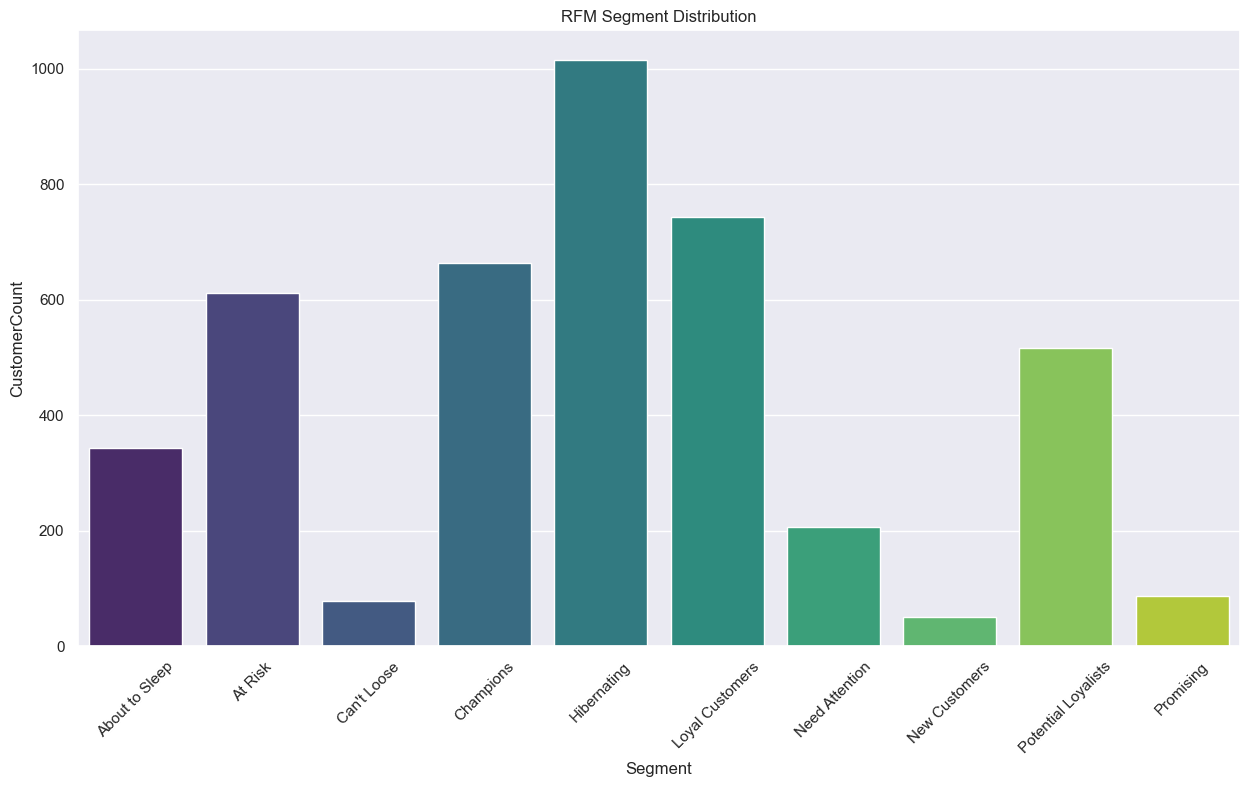

In [64]:
# Let's group by segment and count customers.

segment_counts = df_rfm.groupby("Segment").size().reset_index(name="CustomerCount")

# Let's create an RFM chart according to the number of customers in the segment.

plt.figure(figsize=(15,8))
sns.barplot(data=segment_counts, x="Segment", y="CustomerCount", palette="viridis")
plt.title("RFM Segment Distribution")
plt.xticks(rotation=45)
plt.show()

In [79]:
df_rfm.to_csv('df_rfm.csv', index=True)


In [80]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4314 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         4314 non-null   int64   
 1   Frequency       4314 non-null   int64   
 2   Monetary        4314 non-null   float64 
 3   RecencyScore    4314 non-null   category
 4   FrequencyScore  4314 non-null   category
 5   MonetaryScore   4314 non-null   category
 6   RFM_SCORE       4314 non-null   object  
 7   Segment         4314 non-null   object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 215.5+ KB
